# **ECG Heartbeat Categorization**

**Problem Undestanding**

**The Problem: Heartbeat Classification**

**Dataset** : "Arrhythmia Dataset"
- Number of Samples: 109446
- Number of Categories: 5
- Sampling Frequency: 125Hz
- Data Source: Physionet's MIT-BIH Arrhythmia Dataset
- Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

In [ ]:
classes = {0:'Normal beat',
           1:'Supraventricular premature beat',
           2:'Premature ventricular contraction',
           3:"Fusion of ventricular and normal beat",
           4:'Unclassifiable beat'}

#Data Loading

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d shayanfazeli/heartbeat

Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
 85% 84.0M/98.8M [00:00<00:00, 132MB/s]
100% 98.8M/98.8M [00:00<00:00, 118MB/s]


In [ ]:
!unzip heartbeat.zip

Archive:  heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


In [ ]:
import pandas as pd
train = pd.read_csv('mitbih_train.csv', header=None)
test = pd.read_csv('mitbih_test.csv', header=None)

In [ ]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are 188 columns in our Dataset.
the last column is the label

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

#EDA

https://www.kaggle.com/code/twtylerwilson/starter-ecg-heartbeat-categorization-8431d523-6

<Axes: xlabel='187', ylabel='count'>

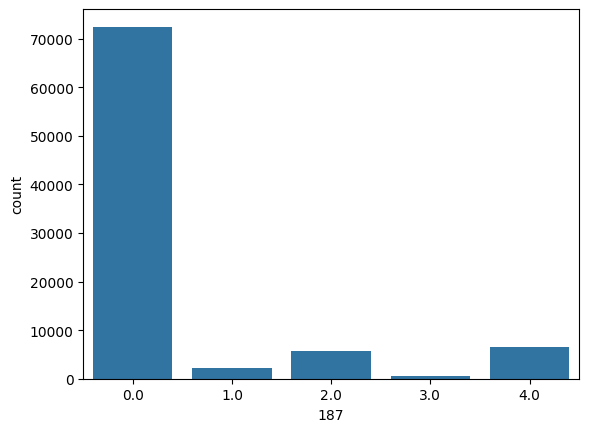

In [ ]:
sns.countplot(x=train[187])

imbalanced data

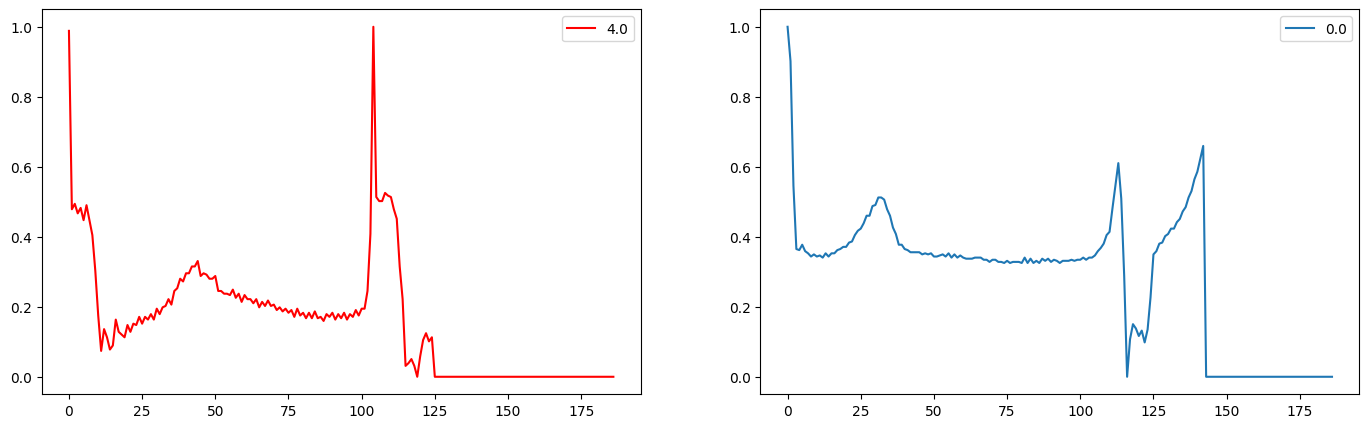

In [ ]:
import random
plt.figure(figsize=(17,5))
plt.subplot(121)
test_row_1=np.array(train.iloc[np.random.randint(0,len(train))])
plt.plot(test_row_1[:-1],label=test_row_1[-1],color='r')
plt.legend()

plt.subplot(122)
test_row_2=np.array(train.iloc[np.random.randint(0,len(train))])
plt.plot(test_row_2[:-1],label=test_row_2[-1])
plt.legend()

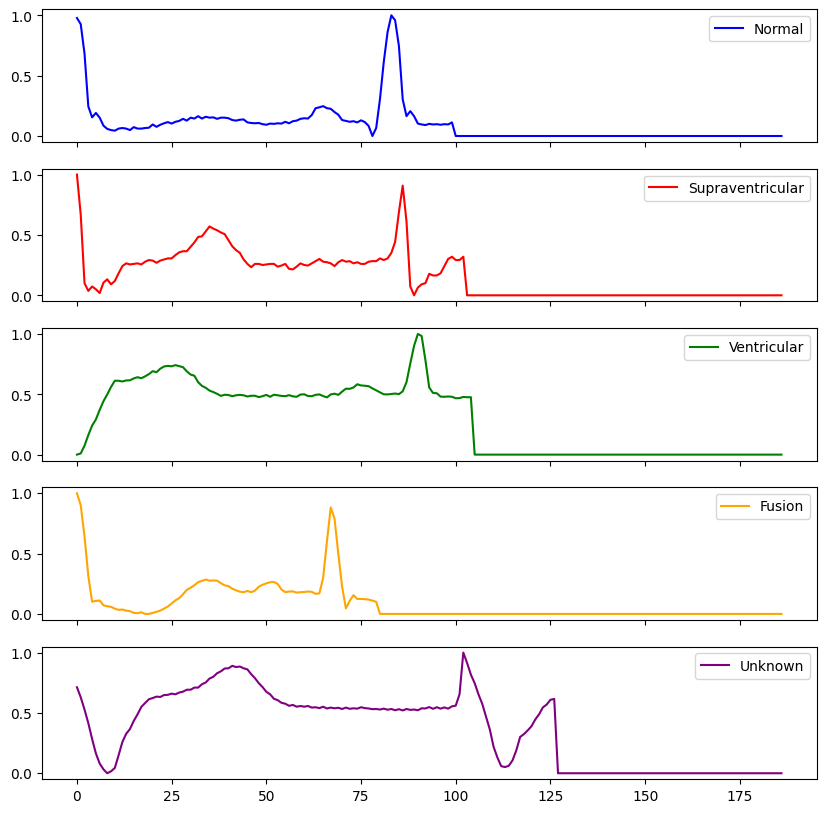

In [ ]:
# plot ECG data belonging to each class label
label = ["Normal","Supraventricular","Ventricular",
         "Fusion","Unknown"]
color = ['blue','red','green','orange','purple']
fig, ax = plt.subplots(5, 1, sharex=True, sharey=True,figsize=(10,10))
for i, row in enumerate(ax):
    row.plot((train[train[187] == i].iloc[0])[:-1], label=label[i], color=color[i])
    row.legend()

<Axes: xlabel='0', ylabel='1'>

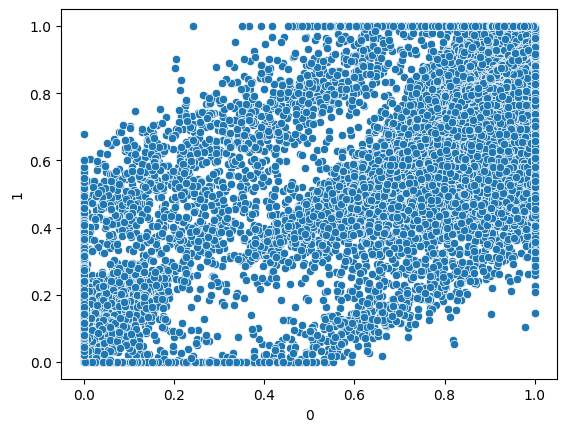

In [ ]:
#scatter plot
sns.scatterplot(x=train[0],y=train[1])

In [ ]:
#correlation
train.corr()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.778516,0.141264,-0.134788,-0.243921,-0.352727,-0.430698,-0.480058,-0.521888,-0.559848,...,-0.051550,-0.044223,-0.039223,-0.035047,-0.035090,-0.035739,-0.035559,-0.033901,-0.032958,-0.166175
1,0.778516,1.000000,0.501528,-0.024286,-0.148470,-0.164901,-0.234436,-0.285260,-0.322706,-0.341306,...,-0.019324,-0.013356,-0.009154,-0.007511,-0.008674,-0.010175,-0.010693,-0.010116,-0.009987,-0.183442
2,0.141264,0.501528,1.000000,0.672398,0.402170,0.345925,0.281478,0.206464,0.138555,0.077503,...,-0.018531,-0.020627,-0.021478,-0.025592,-0.029119,-0.030466,-0.031462,-0.033109,-0.034741,0.252175
3,-0.134788,-0.024286,0.672398,1.000000,0.819907,0.596827,0.475922,0.389027,0.292549,0.199308,...,-0.017025,-0.024396,-0.028907,-0.036101,-0.041249,-0.042956,-0.043560,-0.045399,-0.046860,0.508486
4,-0.243921,-0.148470,0.402170,0.819907,1.000000,0.881908,0.750680,0.663960,0.563274,0.448298,...,0.020470,0.010719,0.003458,-0.006081,-0.012639,-0.015318,-0.016064,-0.019551,-0.020914,0.508453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,-0.035739,-0.010175,-0.030466,-0.042956,-0.015318,0.005908,0.005361,0.015440,0.023275,0.016165,...,0.738338,0.783177,0.832193,0.895911,0.958530,1.000000,0.953214,0.893247,0.855729,0.037706
184,-0.035559,-0.010693,-0.031462,-0.043560,-0.016064,0.004372,0.003806,0.014076,0.022634,0.015333,...,0.714502,0.753969,0.796068,0.848370,0.903837,0.953214,1.000000,0.948725,0.904684,0.038890
185,-0.033901,-0.010116,-0.033109,-0.045399,-0.019551,0.000171,0.000038,0.010937,0.020454,0.012894,...,0.693137,0.727363,0.764190,0.809050,0.852634,0.893247,0.948725,1.000000,0.965155,0.038924
186,-0.032958,-0.009987,-0.034741,-0.046860,-0.020914,-0.001334,-0.001226,0.010157,0.020295,0.012735,...,0.679757,0.711386,0.744049,0.783552,0.822765,0.855729,0.904684,0.965155,1.000000,0.038146


<Axes: >

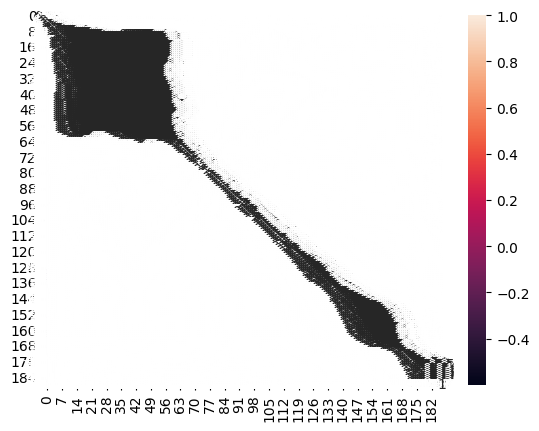

In [ ]:
#heatmap
sns.heatmap(train.corr(),annot = True)

<Axes: >

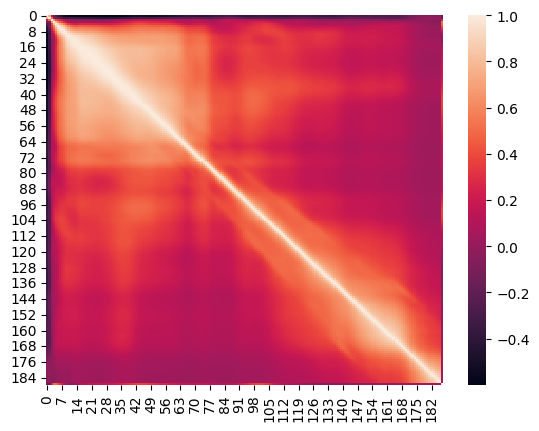

In [ ]:
#heatmap
sns.heatmap(train.corr())

In [ ]:
#checking for zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold = 0)
var_thresh.fit(train)

VarianceThreshold(threshold=0)

In [ ]:
var_thresh.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
import collections, numpy
collections.Counter(var_thresh.get_support())

Counter({True: 188})

In [ ]:
var_thresh.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28',
       'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37',
       'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46',
       'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55',
       'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64',
       'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73',
       'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82',
       'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91',
       'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100',
       'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108',
       'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116',
       'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124',
       'x125

In [ ]:
var = pd.Series(var_thresh.get_support())
var.index = var_thresh.get_feature_names_out()
var

x0      True
x1      True
x2      True
x3      True
x4      True
        ... 
x183    True
x184    True
x185    True
x186    True
x187    True
Length: 188, dtype: bool

# **Data Preprocessing**

In [ ]:
#missing values
train.isnull().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
train

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
train.drop(columns=[187])

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train.loc[:, train.columns != 187]

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
scaled_train = train
pd.DataFrame(scaled_train.iloc[:,0:187])

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#standerdization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train = train
scaled_train = scaler.fit_transform(scaled_train.iloc[:,0:187])

scaled_train = pd.DataFrame(scaled_train)
scaled_train['187'] = train[187]

In [ ]:
scaled_train

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.363548,0.758797,1.132406,0.125650,-0.263843,-0.111820,-0.301699,-0.654419,-0.814241,-0.877525,...,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794,0.0
1,0.289547,0.473768,0.165269,-0.108870,-0.604947,-0.494702,-0.594425,-0.640117,-0.725460,-0.677940,...,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794,0.0
2,0.455113,-0.444975,-1.044794,-0.719430,-0.739067,-0.878027,-0.835114,-0.894440,-0.842006,-0.895782,...,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794,0.0
3,0.145511,-0.416634,0.516772,0.276198,-0.028208,-0.773968,-0.750699,-0.795532,-0.770726,-0.824118,...,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794,0.0
4,0.318696,1.090291,1.790615,1.777627,0.879270,0.223533,-0.337675,-0.635136,-0.473407,-0.276330,...,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,-0.345951,-1.187598,0.496559,1.501957,1.638466,1.592778,1.402577,1.098621,0.497852,-0.355879,...,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794,4.0
87550,-0.714076,-0.690496,0.275818,0.689118,0.172486,-0.525859,-0.863634,-1.129019,-1.156683,-1.089494,...,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794,4.0
87551,0.065431,-0.602630,0.756459,1.722791,1.860904,1.577783,1.339587,1.049331,0.720457,-0.029223,...,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794,4.0
87552,-0.133378,-0.507595,1.854774,0.140167,-0.192246,-0.458115,-0.472261,-0.452800,-0.463997,-0.552157,...,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794,4.0


In [ ]:
scaled_train['187'].value_counts()

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

In [ ]:
641+2223+5788+6431+6431

21514

In [ ]:
scaled_train

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.363548,0.758797,1.132406,0.125650,-0.263843,-0.111820,-0.301699,-0.654419,-0.814241,-0.877525,...,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794,0.0
1,0.289547,0.473768,0.165269,-0.108870,-0.604947,-0.494702,-0.594425,-0.640117,-0.725460,-0.677940,...,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794,0.0
2,0.455113,-0.444975,-1.044794,-0.719430,-0.739067,-0.878027,-0.835114,-0.894440,-0.842006,-0.895782,...,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794,0.0
3,0.145511,-0.416634,0.516772,0.276198,-0.028208,-0.773968,-0.750699,-0.795532,-0.770726,-0.824118,...,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794,0.0
4,0.318696,1.090291,1.790615,1.777627,0.879270,0.223533,-0.337675,-0.635136,-0.473407,-0.276330,...,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,-0.345951,-1.187598,0.496559,1.501957,1.638466,1.592778,1.402577,1.098621,0.497852,-0.355879,...,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794,4.0
87550,-0.714076,-0.690496,0.275818,0.689118,0.172486,-0.525859,-0.863634,-1.129019,-1.156683,-1.089494,...,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794,4.0
87551,0.065431,-0.602630,0.756459,1.722791,1.860904,1.577783,1.339587,1.049331,0.720457,-0.029223,...,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794,4.0
87552,-0.133378,-0.507595,1.854774,0.140167,-0.192246,-0.458115,-0.472261,-0.452800,-0.463997,-0.552157,...,-0.113797,-0.109952,-0.105881,-0.102064,-0.098977,-0.095748,-0.092596,-0.089594,-0.08794,4.0


In [ ]:
desired_values = [1.0, 2.0, 3.0, 4.0]  # Modify this list with your specific values
t1 = scaled_train[scaled_train['187'].isin(desired_values)]
t2 = scaled_train[scaled_train['187'].eq(0.0)].sample(6431)
PCA_train = pd.concat([t1, t2], ignore_index=True)

In [ ]:
PCA_train['187'].value_counts()

187
4.0    6431
0.0    6431
2.0    5788
1.0    2223
3.0     641
Name: count, dtype: int64

In [ ]:
len(PCA_train)

21514

In [ ]:
641+2223+5788+6431

15083

In [ ]:
641+2223+5788+6431 +6431

21514

#PCA

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [ ]:
len(train)

87554

In [ ]:
len(PCA_train)

21514

In [ ]:
PCA_train.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
183    float64
184    float64
185    float64
186    float64
187    float64
Length: 188, dtype: object

In [ ]:
PCA_train['187']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
21509    0.0
21510    0.0
21511    0.0
21512    0.0
21513    0.0
Name: 187, Length: 21514, dtype: float64

In [ ]:
PCA_train.rename(columns = {'187':187}, inplace = True)

In [ ]:
scaled_train.rename(columns = {'187':187}, inplace = True)

In [ ]:
PCA_train[187]

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
21509    0.0
21510    0.0
21511    0.0
21512    0.0
21513    0.0
Name: 187, Length: 21514, dtype: float64

In [ ]:

#elbow method for k-means clustering
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 187, 3)

for k in K:
    # Building and fitting the model
    print(k)
    kmeanModel = KMeans(n_clusters=k).fit(PCA_train)
    kmeanModel.fit(PCA_train)

    distortions.append(sum(np.min(cdist(PCA_train, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / PCA_train.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(PCA_train, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / PCA_train.shape[0]
    mapping2[k] = kmeanModel.inertia_

1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


13


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


16


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


19


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


22


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


25


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


28


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


31


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


34


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


37


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


43


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


46


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


49


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


52


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


55


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


58


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


61


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


67


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


70


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


73


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


76


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


82


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


85


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


88


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


91


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


94


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


97


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


100


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


103


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


106


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


109


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


112


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


115


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


118


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


121


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


124


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


127


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


130


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


133


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


136


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


139


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


142


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


145


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


148


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


151


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


154


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


157


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


160


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


163


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


166


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


169


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


172


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


175


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


178


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


181


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


184


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 13.645564680444599
4 : 10.479601344180297
7 : 9.245983834048877
10 : 8.772861655133761
13 : 8.336137196983335
16 : 8.087545560191941
19 : 7.862280753288361
22 : 7.6637374512803245
25 : 7.457840556171026
28 : 7.329509871100072
31 : 7.176895463272495
34 : 7.078421963130129
37 : 6.94714652885871
40 : 6.832263818654284
43 : 6.7490719371207515
46 : 6.677923526054579
49 : 6.616495621916305
52 : 6.53095739968113
55 : 6.484053676656122
58 : 6.398364852553968
61 : 6.363509130670387
64 : 6.289332070218509
67 : 6.248801894993716
70 : 6.198478955086284
73 : 6.169327445952361
76 : 6.10869941935698
79 : 6.064867087538815
82 : 6.023692333711867
85 : 6.003296841708914
88 : 5.944634836657257
91 : 5.919837864659463
94 : 5.870545527556627
97 : 5.8307365028681994
100 : 5.7953445406313815
103 : 5.767770684102992
106 : 5.728374227637701
109 : 5.720624033957926
112 : 5.678473903471651
115 : 5.641070486694274
118 : 5.6367090030874305
121 : 5.600802040171217
124 : 5.561742320894419
127 : 5.546284212101593


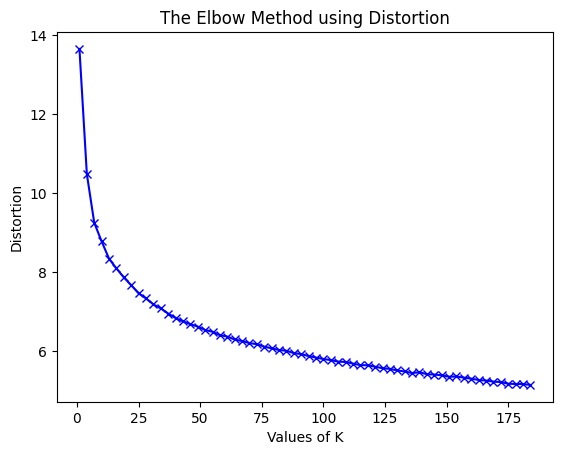

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 5042312.740256422
4 : 2687783.124702476
7 : 2196787.5470264433
10 : 1934577.329065522
13 : 1764292.6736335978
16 : 1635194.506326911
19 : 1549384.480981928
22 : 1471445.839690023
25 : 1409507.7395794163
28 : 1357308.8332533478
31 : 1306931.7515480374
34 : 1264606.8595057423
37 : 1232057.9499693182
40 : 1196557.4492879817
43 : 1168385.3519248173
46 : 1138253.1007601684
49 : 1112068.1651466088
52 : 1092010.0902849492
55 : 1071995.0256728583
58 : 1053789.025258337
61 : 1036751.9244834348
64 : 1021147.0296781634
67 : 1001830.303229045
70 : 989155.471614037
73 : 976919.8835709973
76 : 959279.2862782266
79 : 948283.3647961819
82 : 936048.2539398734
85 : 921742.0205883558
88 : 912507.3417883834
91 : 899098.2464099327
94 : 887616.6639947819
97 : 873884.5447428991
100 : 868671.8233387255
103 : 860262.2867976644
106 : 850648.0628781283
109 : 840568.9437787235
112 : 832057.6554061302
115 : 825513.5340037779
118 : 817622.0308122237
121 : 810202.0862462951
124 : 802257.7636489238
127 : 794676.0

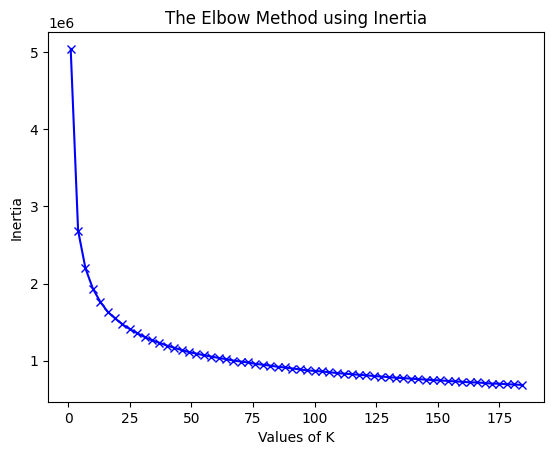

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
scaled_train['187']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87549    4.0
87550    4.0
87551    4.0
87552    4.0
87553    4.0
Name: 187, Length: 87554, dtype: float64

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pca = PCA()
pca.fit(scaled_train)


PCA()

In [ ]:
pca.explained_variance_ratio_

array([3.64137565e-01, 1.55421239e-01, 6.62935219e-02, 4.85226080e-02,
       3.35576933e-02, 2.59469479e-02, 2.24259083e-02, 1.78008337e-02,
       1.65146278e-02, 1.47167727e-02, 1.31964389e-02, 1.18273522e-02,
       1.16305055e-02, 1.09868517e-02, 1.00180625e-02, 9.94898218e-03,
       9.26246299e-03, 8.78857241e-03, 8.35656575e-03, 7.61796236e-03,
       6.63898968e-03, 6.41755093e-03, 5.64214404e-03, 5.28461077e-03,
       4.83878050e-03, 4.59627054e-03, 4.46866141e-03, 4.23572793e-03,
       4.09875831e-03, 3.92732265e-03, 3.77282219e-03, 3.66207563e-03,
       3.39358215e-03, 3.28394161e-03, 3.14556743e-03, 2.89042754e-03,
       2.81547496e-03, 2.59776726e-03, 2.45325466e-03, 2.39291865e-03,
       2.29278980e-03, 2.15420559e-03, 2.03182620e-03, 1.92726377e-03,
       1.89711836e-03, 1.87661999e-03, 1.78338817e-03, 1.69724660e-03,
       1.58169515e-03, 1.46776149e-03, 1.41963765e-03, 1.36180858e-03,
       1.31175993e-03, 1.25221530e-03, 1.18752180e-03, 1.11441293e-03,
      

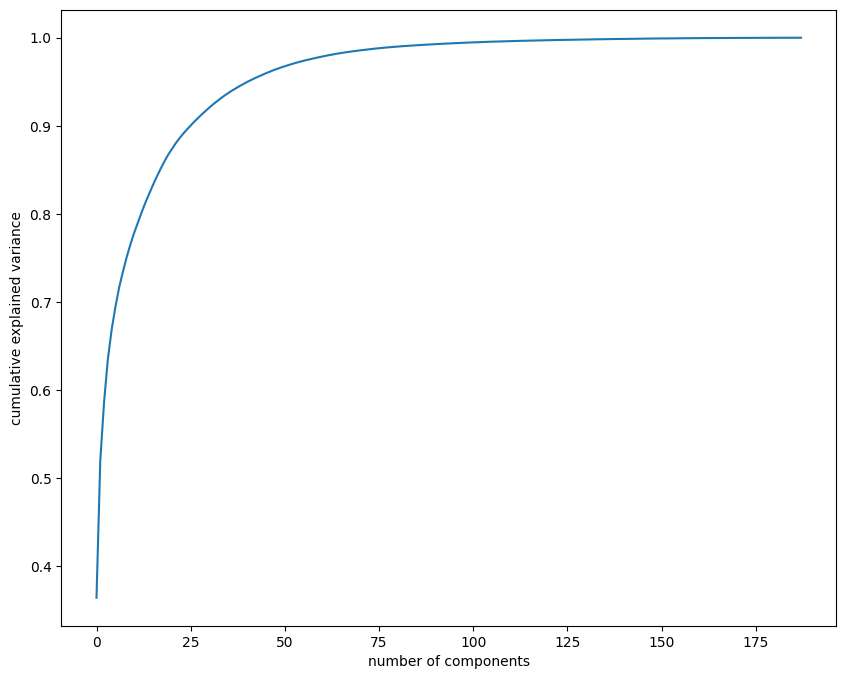

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
X_train = scaled_train.drop(columns=[187])
y_train = scaled_train[187]

In [ ]:
from sklearn.decomposition import PCA
def apply_PCA(X, num_components):
  pca = PCA(num_components)
  components = pca.fit_transform(X)
  pd.DataFrame(components).head()
  return pd.DataFrame(components)

In [ ]:
data_no_comp = apply_PCA(X_train, 0.9)

In [ ]:
data_no_comp

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-6.788116,0.541810,-0.082645,1.823653,-2.353833,1.232059,-0.480294,1.486241,1.107569,2.620038,...,-1.398597,1.102501,0.437722,0.758326,-0.261275,-0.665689,1.640477,-0.497492,0.076769,-0.881352
1,-6.701042,3.066168,-2.549003,-1.755402,2.969014,-0.466413,-1.261609,-1.588299,-1.336356,0.347028,...,-2.368399,-0.702543,2.182676,-1.821484,-0.210012,0.942640,0.371975,-1.650370,0.102272,0.525440
2,-8.609943,1.549093,0.641707,-1.222478,0.501361,0.108938,-2.829194,1.023569,0.240878,1.552232,...,-0.118164,0.903542,0.336249,0.435466,-1.004055,0.111200,1.291279,-1.481171,-0.165358,-0.313341
3,-7.360484,0.720979,0.274347,1.056427,-1.990117,1.429643,-0.741897,1.876701,-1.070033,2.763265,...,1.284331,0.864354,0.483636,0.247717,-1.307317,0.480903,0.019030,-1.461459,-1.165279,-0.224786
4,-5.196922,4.263617,-4.377267,-2.907285,4.334968,-1.152699,0.174368,-0.540681,0.012569,2.018440,...,-0.810768,0.778517,2.260944,-1.367255,-1.375816,0.422272,0.952075,-0.885684,0.030299,-0.764625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,-1.614565,-1.188084,-1.466140,2.673766,-0.534223,-3.227438,1.962566,1.070122,0.765141,-1.380038,...,-0.497294,1.518286,-1.037921,0.367632,1.455842,1.342361,0.579105,0.417131,-0.112894,0.086981
87550,11.487819,-6.577916,-0.908950,3.364575,0.396187,-0.683460,-3.710063,-4.176545,3.460388,0.063797,...,1.161796,0.837804,-0.903454,-0.604159,-0.330990,0.121761,0.265459,-0.183256,1.154734,0.187791
87551,10.357445,-6.278907,-1.355267,4.249576,-0.508580,-2.156481,2.457720,-3.659990,2.399191,0.795992,...,1.381605,-0.535043,0.176960,0.517785,-0.327787,0.463541,0.854518,0.401972,-1.098984,-0.814059
87552,-6.473413,1.753435,-3.408459,2.420052,0.684101,-2.700150,1.286397,-0.501293,-0.332955,-0.682997,...,2.056781,-0.881909,-1.118423,-0.715471,-0.733942,-0.847466,-0.828601,-0.573291,0.091604,-0.063412


In [ ]:
data_per = apply_PCA(X_train, 50)

In [ ]:
data_per

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-6.788116,0.541810,-0.082645,1.823653,-2.353833,1.232060,-0.480293,1.486240,1.107572,2.620041,...,0.274001,-0.030826,-0.101862,-0.027708,-0.008156,-0.156127,0.223814,-0.220446,-0.012459,0.065801
1,-6.701042,3.066168,-2.549003,-1.755402,2.969014,-0.466414,-1.261610,-1.588300,-1.336361,0.347029,...,0.032677,-1.072958,-0.547335,0.427357,1.429232,-0.080240,-0.138865,-0.083607,0.102671,-0.266222
2,-8.609943,1.549093,0.641707,-1.222478,0.501361,0.108936,-2.829196,1.023572,0.240874,1.552227,...,0.406148,-0.552550,-0.197669,0.198370,-0.243525,0.217760,0.356437,-0.623452,0.274718,-0.104635
3,-7.360484,0.720979,0.274347,1.056427,-1.990117,1.429643,-0.741896,1.876700,-1.070030,2.763265,...,-0.293492,-0.081152,0.096198,0.037204,-0.120018,0.338970,-0.401256,0.169934,0.010215,0.109204
4,-5.196922,4.263617,-4.377267,-2.907285,4.334968,-1.152699,0.174368,-0.540681,0.012570,2.018442,...,0.527145,0.119559,-0.464617,-0.669822,0.046548,0.270271,-0.046045,0.169624,-0.338711,0.085568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,-1.614565,-1.188084,-1.466140,2.673767,-0.534222,-3.227436,1.962567,1.070121,0.765145,-1.380034,...,0.100020,-0.341016,-0.046498,0.331617,-0.468432,0.251413,0.259975,-0.382175,-0.398318,-0.428869
87550,11.487819,-6.577916,-0.908950,3.364576,0.396187,-0.683460,-3.710063,-4.176546,3.460387,0.063799,...,-0.581885,0.646689,0.261764,0.674210,-0.510878,0.141683,-0.485014,0.028964,0.402951,0.252305
87551,10.357445,-6.278907,-1.355267,4.249576,-0.508580,-2.156480,2.457721,-3.659989,2.399195,0.795994,...,-0.157269,-0.088335,-0.561226,0.205545,1.050691,-0.194586,-0.074347,-0.094146,0.226599,0.187309
87552,-6.473413,1.753435,-3.408459,2.420052,0.684102,-2.700150,1.286398,-0.501294,-0.332953,-0.682994,...,0.920704,-0.669759,-0.245898,-0.069514,0.678148,-0.583292,0.416068,0.203479,-0.029844,0.311861


<Axes: >

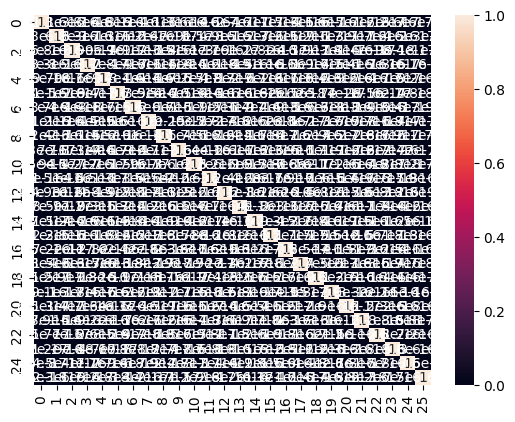

In [ ]:
#heatmap
sns.heatmap(data_no_comp.corr(),annot = True)

<Axes: >

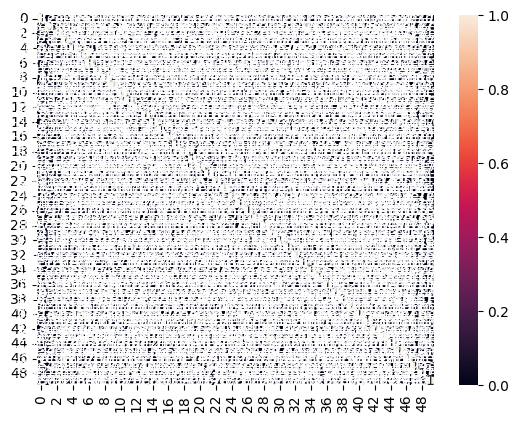

In [ ]:
#heatmap
sns.heatmap(data_per.corr(),annot = True)

#Modeling

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


data_no_comp

In [ ]:

X_train_comp, X_test_comp, y_train_comp, y_test_comp = train_test_split(data_no_comp, y_train, test_size=0.2, random_state=42)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_comp, y_train_comp)
y_pred_comp = log_reg.predict(X_test_comp)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def evaluation(y_test, y_pred):
  print("accuracy: ",accuracy_score(y_test, y_pred))
  print("Precision:",  precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1-Score:",  f1_score(y_test, y_pred, average='weighted'))
  print('================================')

  print("classification report: ")
  print(classification_report(y_test, y_pred))
  print('================================')

  print("confussion matrix")
  print(confusion_matrix(y_test, y_pred))
  print()
  plt.figure(figsize=(8, 6))
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False,fmt='g')
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()

accuracy:  0.8924104848381018
Precision: 0.8663666980576948
Recall: 0.8924104848381018
F1-Score: 0.8684677476806841
classification report: 
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     14579
         1.0       0.46      0.07      0.13       426
         2.0       0.51      0.20      0.29      1112
         3.0       0.70      0.10      0.17       145
         4.0       0.87      0.85      0.86      1249

    accuracy                           0.89     17511
   macro avg       0.69      0.44      0.48     17511
weighted avg       0.87      0.89      0.87     17511

confussion matrix
[[14300    11   187     3    78]
 [  386    31     7     0     2]
 [  783    26   221     3    79]
 [  125     0     6    14     0]
 [  179     0     9     0  1061]]



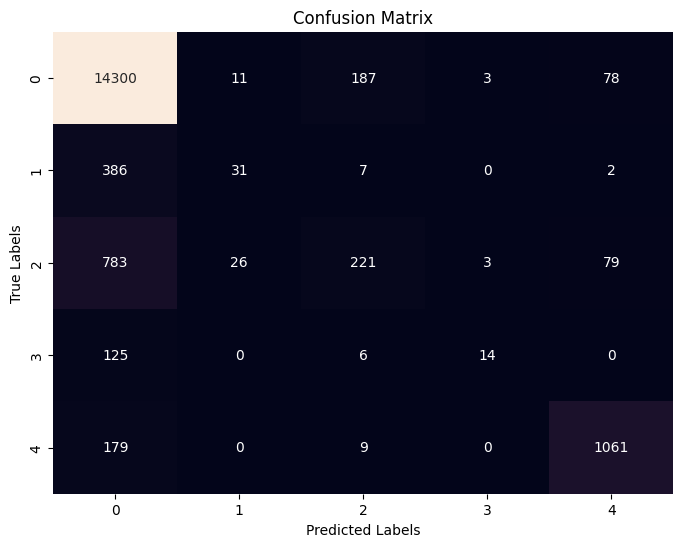

In [ ]:
evaluation(y_test_comp,y_pred_comp)

In [ ]:
y_test_comp.value_counts()

187
0.0    14579
4.0     1249
2.0     1112
1.0      426
3.0      145
Name: count, dtype: int64

data_per

In [ ]:

X_train_per, X_test_per, y_train_per, y_test_per = train_test_split(data_per, y_train, test_size=0.2, random_state=42)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_per, y_train_per)
y_pred_per = log_reg.predict(X_test_per)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.9048026954485752
Precision: 0.8897232880011139
Recall: 0.9048026954485752
F1-Score: 0.8874799081149919
classification report: 
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     14579
         1.0       0.67      0.14      0.24       426
         2.0       0.61      0.32      0.42      1112
         3.0       0.75      0.17      0.27       145
         4.0       0.92      0.86      0.89      1249

    accuracy                           0.90     17511
   macro avg       0.77      0.49      0.55     17511
weighted avg       0.89      0.90      0.89     17511

confussion matrix
[[14331    18   179     2    49]
 [  339    61    24     0     2]
 [  700    12   351     6    43]
 [  112     0     9    24     0]
 [  163     0     9     0  1077]]



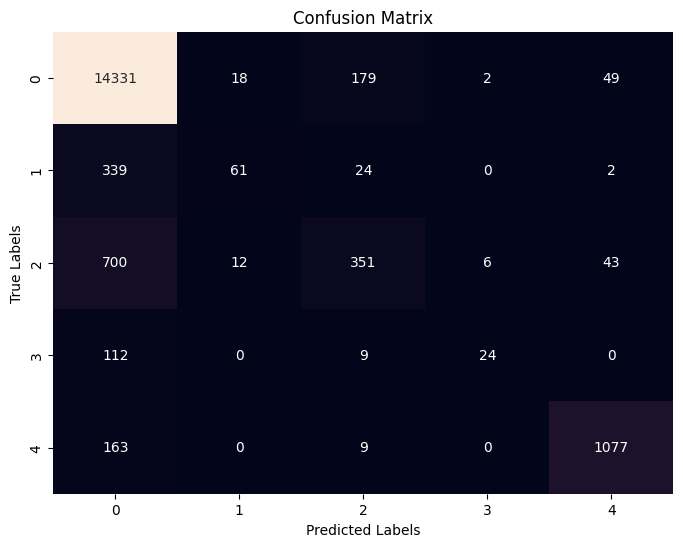

In [ ]:
evaluation(y_test_per,y_pred_per)

insights: the results are so bad

only class 0 and 4 has acceptable results

maybe because of model imbalanced

#fixing model imbalance

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [ ]:
import pandas as pd
train = pd.read_csv('mitbih_train.csv', header=None)
test = pd.read_csv('mitbih_test.csv', header=None)

In [ ]:
train[187].value_counts()

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

In [ ]:
X_oversampled,y_oversampled=smote.fit_resample(train.drop(columns=[187]),train[187])

In [ ]:
y_oversampled.value_counts()

187
0.0    72471
1.0    72471
2.0    72471
3.0    72471
4.0    72471
Name: count, dtype: int64

In [ ]:
#standerdization
scaled_train_oversampled = scaler.fit_transform(X_oversampled)
scaled_train_oversampled = pd.DataFrame(scaled_train_oversampled)


In [ ]:
scaled_train_oversampled

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.486586,0.724525,0.807826,-0.268081,-0.523664,-0.350397,-0.477955,-0.794680,-0.955047,-0.950147,...,-0.197559,-0.194335,-0.189389,-0.187197,-0.183251,-0.180099,-0.17851,-0.17801,-0.175917,-0.175135
1,0.422352,0.481117,-0.076155,-0.462712,-0.795185,-0.672253,-0.739645,-0.781176,-0.865801,-0.742769,...,-0.197559,-0.194335,-0.189389,-0.187197,-0.183251,-0.180099,-0.17851,-0.17801,-0.175917,-0.175135
2,0.566067,-0.303473,-1.182175,-0.969423,-0.901945,-0.994483,-0.954816,-1.021316,-0.982958,-0.969117,...,-0.197559,-0.194335,-0.189389,-0.187197,-0.183251,-0.180099,-0.17851,-0.17801,-0.175917,-0.175135
3,0.297324,-0.279270,0.245125,-0.143139,-0.336096,-0.907009,-0.879351,-0.927925,-0.911304,-0.894655,...,-0.197559,-0.194335,-0.189389,-0.187197,-0.183251,-0.180099,-0.17851,-0.17801,-0.175917,-0.175135
4,0.447654,1.007615,1.409440,1.102915,0.386262,-0.068493,-0.510116,-0.776473,-0.612429,-0.325479,...,-0.197559,-0.194335,-0.189389,-0.187197,-0.183251,-0.180099,-0.17851,-0.17801,-0.175917,-0.175135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362350,0.566067,0.728231,0.592199,0.333694,-0.185270,-0.334834,-0.214328,-0.171386,-0.125159,-0.058204,...,-0.197559,-0.194335,-0.189389,-0.187197,-0.183251,-0.180099,-0.17851,-0.17801,-0.175917,-0.175135
362351,0.318095,-0.866224,0.246918,0.913645,1.274678,1.240808,1.367136,1.112558,0.679998,-0.172402,...,-0.197559,-0.194335,-0.189389,-0.187197,-0.183251,-0.180099,-0.17851,-0.17801,-0.175917,-0.175135
362352,-0.444126,-0.905224,-0.010806,0.518033,0.606810,0.457959,0.403570,0.112732,-0.061968,-0.692739,...,-0.197559,-0.194335,-0.189389,-0.187197,-0.183251,-0.180099,-0.17851,-0.17801,-0.175917,-0.175135
362353,-0.723044,-0.788338,-0.161931,0.048332,-0.251013,-0.731712,-0.951968,-1.225099,-1.299281,-1.100424,...,-0.197559,-0.194335,-0.189389,-0.187197,-0.183251,-0.180099,-0.17851,-0.17801,-0.175917,-0.175135


In [ ]:
oversampled_no_comp = apply_PCA(scaled_train_oversampled, 50)

In [ ]:
oversampled_no_comp

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-7.115384,1.267555,1.624044,-1.623370,-2.958578,-0.780634,2.706548,0.705773,-0.595645,-0.897674,...,0.482953,0.587368,0.078642,-0.755120,0.372860,0.173567,0.113711,-0.006563,0.231611,0.377715
1,-7.330412,3.838453,2.525928,2.411235,-2.793304,-0.756205,-2.792744,0.105476,0.175494,3.001178,...,0.063189,-0.458391,0.331937,0.367500,1.011822,0.138960,1.072725,-0.488718,0.078908,-0.402044
2,-9.130138,2.311924,-0.378572,0.666388,-4.191405,-0.322413,0.365183,-0.356591,-1.275797,0.514496,...,1.162148,-0.093353,0.593335,-0.445126,0.736641,0.660314,0.015664,0.354160,0.226600,0.568213
3,-7.741135,1.550013,1.068340,-0.917195,-2.213768,-0.258069,2.647716,2.046398,-2.425056,-0.159130,...,0.310668,-0.462058,0.762837,0.646182,-0.065872,0.324150,-0.529501,-0.152300,-0.237438,-0.301708
4,-5.935698,5.066222,3.876040,4.409288,-2.385941,0.367463,-4.232470,-0.324225,0.357716,0.617944,...,0.097288,0.196819,0.120194,-0.158409,0.117679,-0.841161,-0.051999,-0.002969,-0.222262,-0.110338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362350,-3.394624,-0.322980,2.575914,-1.710076,-0.826470,0.952536,0.808358,0.216990,-0.896391,0.389487,...,-0.206889,-0.376114,-0.102850,0.209854,0.133007,0.081631,-0.186321,-0.118964,-0.118317,0.102049
362351,-2.241529,-1.223853,2.890283,-2.560053,0.555213,2.944741,0.030553,-1.629676,-0.631192,-0.410041,...,-0.367572,0.618635,-0.038637,0.085565,-0.197309,-0.293010,0.068741,-0.142790,-0.297667,-0.526357
362352,3.201507,-4.363225,1.077466,-2.693307,1.484384,-1.035762,-0.218986,-1.674087,-0.741770,-0.291758,...,-0.160267,-0.368499,0.267618,0.121450,0.264915,-0.246598,-0.100639,-0.134117,-0.137136,0.285611
362353,10.535975,-4.950536,3.344655,0.526786,-0.483406,-3.108359,-3.382968,0.117287,0.265156,0.173841,...,-0.940223,1.017146,-0.269945,1.204269,-0.109383,0.332482,0.092325,0.043495,-0.646077,0.262206


In [ ]:
oversampled_per = apply_PCA(scaled_train_oversampled, 0.9)

In [ ]:
oversampled_per

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-7.115384,1.267555,1.624044,-1.623370,-2.958578,-0.780634,2.706548,0.705773,-0.595645,-0.897673,-0.941005,0.745669,0.301047,-1.329624,-2.105658,1.204661,-0.136371,-2.619413,0.446077
1,-7.330412,3.838453,2.525928,2.411235,-2.793304,-0.756205,-2.792744,0.105476,0.175494,3.001179,2.491373,4.040796,-1.580050,0.093089,-2.910553,-0.414106,1.766608,1.366660,-1.217211
2,-9.130138,2.311924,-0.378572,0.666388,-4.191405,-0.322413,0.365183,-0.356591,-1.275798,0.514495,-0.429478,-0.079332,0.285865,-0.329035,-1.009615,2.405256,-0.127734,-0.598932,0.459338
3,-7.741135,1.550013,1.068340,-0.917195,-2.213768,-0.258069,2.647716,2.046398,-2.425056,-0.159131,-1.461993,0.348207,-0.973503,0.385173,-1.188914,3.803225,-0.976406,-1.127074,-0.105494
4,-5.935698,5.066222,3.876040,4.409288,-2.385941,0.367463,-4.232470,-0.324225,0.357716,0.617943,2.121388,6.428602,0.812417,1.527478,-2.058250,-0.289789,0.163693,1.636932,-2.837999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362350,-3.394624,-0.322980,2.575914,-1.710076,-0.826470,0.952536,0.808358,0.216989,-0.896391,0.389487,1.321521,1.161976,0.180273,0.550059,0.139995,-0.745643,0.311302,-0.156019,0.083336
362351,-2.241529,-1.223853,2.890283,-2.560053,0.555213,2.944741,0.030553,-1.629676,-0.631192,-0.410041,2.281408,0.570044,-0.004029,-0.538556,0.791701,0.528473,0.193038,-0.121367,1.696216
362352,3.201507,-4.363225,1.077466,-2.693307,1.484384,-1.035762,-0.218986,-1.674086,-0.741770,-0.291758,1.502969,1.299781,-0.432319,0.352136,0.576240,0.607821,0.530126,-0.259994,0.610603
362353,10.535975,-4.950536,3.344655,0.526786,-0.483406,-3.108359,-3.382968,0.117287,0.265156,0.173842,-3.195706,-3.647566,-0.032585,-1.811263,1.919737,0.755173,-0.570633,0.285741,2.879765


In [ ]:
X_train_comp_O, X_test_comp_O, y_train_comp_O, y_test_comp_O = train_test_split(oversampled_no_comp, y_oversampled, test_size=0.2, random_state=42)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_comp_O, y_train_comp_O)
y_pred_comp_O = log_reg.predict(X_test_comp_O)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.758703481392557
Precision: 0.7580165203220014
Recall: 0.758703481392557
F1-Score: 0.758068733887648
classification report: 
              precision    recall  f1-score   support

         0.0       0.58      0.56      0.57     14462
         1.0       0.76      0.73      0.75     14535
         2.0       0.72      0.74      0.73     14419
         3.0       0.81      0.87      0.84     14432
         4.0       0.92      0.90      0.91     14623

    accuracy                           0.76     72471
   macro avg       0.76      0.76      0.76     72471
weighted avg       0.76      0.76      0.76     72471

confussion matrix
[[ 8157  2629  2049  1207   420]
 [ 2964 10607   578   308    78]
 [ 1313   503 10629  1282   692]
 [ 1043   132   753 12484    20]
 [  628    43   775    70 13107]]



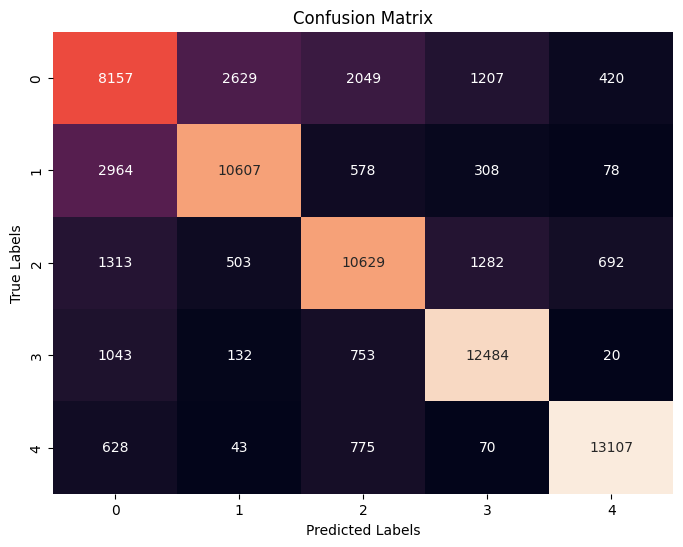

In [ ]:
evaluation(y_test_comp_O,y_pred_comp_O)

In [ ]:
X_train_per_O, X_test_per_O, y_train_per_O, y_test_per_O = train_test_split(oversampled_per, y_oversampled, test_size=0.2, random_state=42)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_per_O, y_train_per_O)
y_pred_per_O = log_reg.predict(X_test_per_O)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.6897655613969725
Precision: 0.68726207982089
Recall: 0.6897655613969725
F1-Score: 0.68715594803796
classification report: 
              precision    recall  f1-score   support

         0.0       0.48      0.50      0.49     14462
         1.0       0.66      0.67      0.67     14535
         2.0       0.65      0.54      0.59     14419
         3.0       0.80      0.86      0.83     14432
         4.0       0.85      0.88      0.86     14623

    accuracy                           0.69     72471
   macro avg       0.69      0.69      0.69     72471
weighted avg       0.69      0.69      0.69     72471

confussion matrix
[[ 7167  3141  2123  1434   597]
 [ 3631  9748   576   480   100]
 [ 2488  1474  7751  1100  1606]
 [ 1193   293   498 12428    20]
 [  572   110  1001    46 12894]]



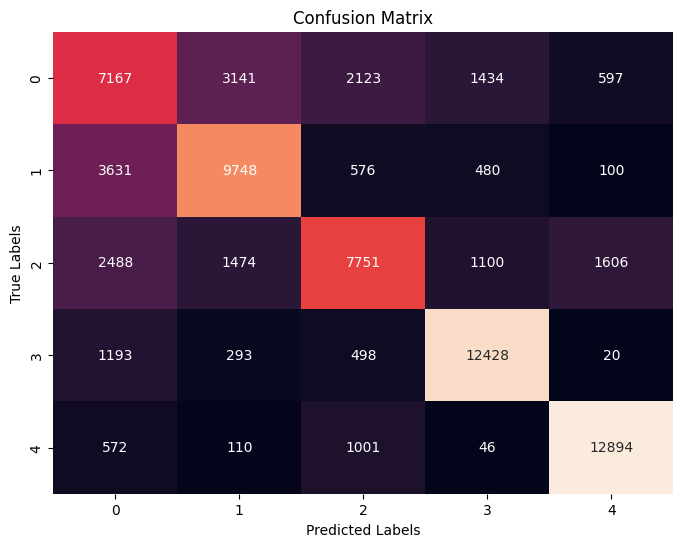

In [ ]:
evaluation(y_test_per_O,y_pred_per_O)

#random forest before handeling imbalance data

In [ ]:
rf=RandomForestClassifier()

number components

In [ ]:
rf.fit(X_train_comp,y_train_comp)
y_pred_rf_comp=rf.predict(X_test_comp)

accuracy:  0.9700188452972417
Precision: 0.9697958885898489
Recall: 0.9700188452972417
F1-Score: 0.9679578958192049
classification report: 
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     14579
         1.0       0.97      0.58      0.73       426
         2.0       0.95      0.83      0.89      1112
         3.0       0.90      0.59      0.71       145
         4.0       0.99      0.94      0.97      1249

    accuracy                           0.97     17511
   macro avg       0.96      0.79      0.86     17511
weighted avg       0.97      0.97      0.97     17511

confussion matrix
[[14549     8    18     2     2]
 [  172   247     7     0     0]
 [  174     0   927     7     4]
 [   44     0    16    85     0]
 [   68     0     3     0  1178]]



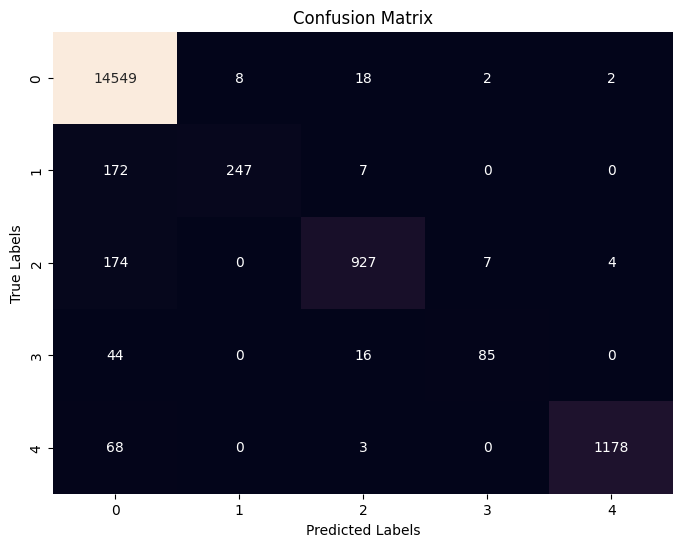

In [ ]:
evaluation(y_test_comp,y_pred_rf_comp)

percentage

In [ ]:
rf.fit(X_train_per,y_train_per)
y_pred_rf_per=rf.predict(X_test_per)

accuracy:  0.9683627434184227
Precision: 0.9681840830254193
Recall: 0.9683627434184227
F1-Score: 0.9661837744559495
classification report: 
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     14579
         1.0       0.97      0.58      0.73       426
         2.0       0.96      0.81      0.88      1112
         3.0       0.89      0.59      0.71       145
         4.0       1.00      0.94      0.97      1249

    accuracy                           0.97     17511
   macro avg       0.96      0.78      0.85     17511
weighted avg       0.97      0.97      0.97     17511

confussion matrix
[[14551     8    18     1     1]
 [  171   247     8     0     0]
 [  198     0   903     9     2]
 [   47     0    13    85     0]
 [   75     0     3     0  1171]]



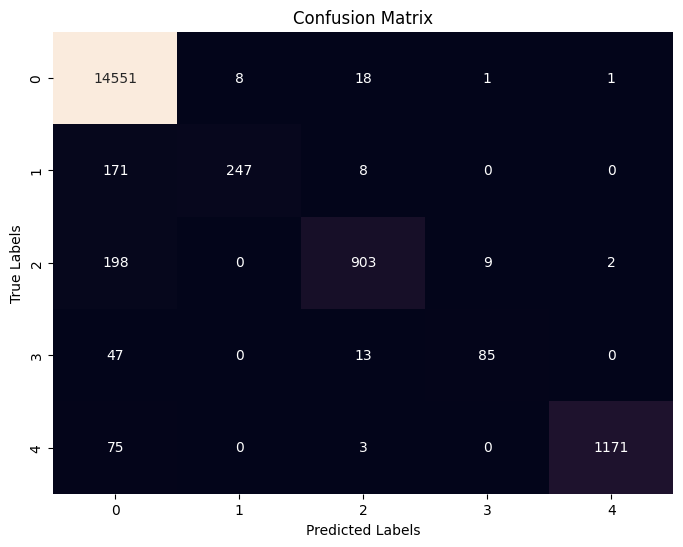

In [ ]:
evaluation(y_test_per,y_pred_rf_per)

#random forest after handeling imbalance data

number components

In [ ]:
#X_train_comp_O, X_test_comp_O, y_train_comp_O, y_test_comp_O
rf.fit(X_train_comp_O,y_train_comp_O)
y_pred_rf_comp_O=rf.predict(X_test_comp_O)

accuracy:  0.9966607332588208
Precision: 0.9966593884074898
Recall: 0.9966607332588208
F1-Score: 0.9966584245492004
classification report: 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     14462
         1.0       1.00      1.00      1.00     14535
         2.0       1.00      1.00      1.00     14419
         3.0       1.00      1.00      1.00     14432
         4.0       1.00      1.00      1.00     14623

    accuracy                           1.00     72471
   macro avg       1.00      1.00      1.00     72471
weighted avg       1.00      1.00      1.00     72471

confussion matrix
[[14316    69    49    19     9]
 [   40 14494     0     1     0]
 [   25     0 14384    10     0]
 [    0     0     0 14432     0]
 [   13     1     6     0 14603]]



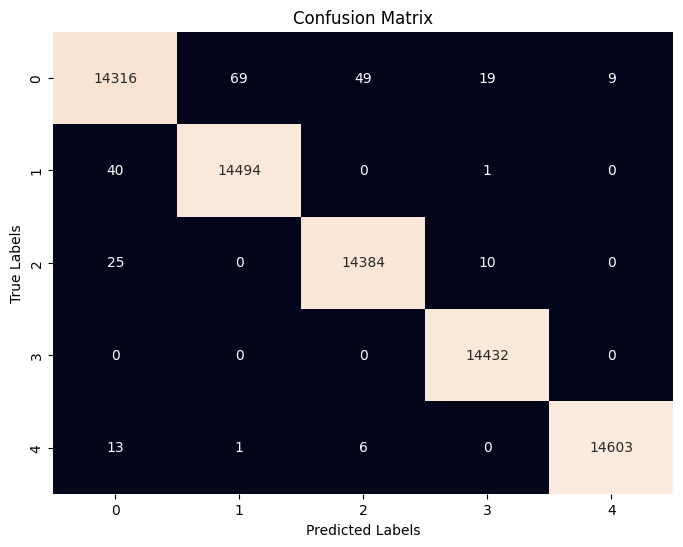

In [ ]:
evaluation(y_test_comp_O,y_pred_rf_comp_O)

percentage

In [ ]:
#X_train_per_O, X_test_per_O, y_train_per_O, y_test_per_O
rf.fit(X_train_per_O,y_train_per_O)
y_pred_rf_per_O=rf.predict(X_test_per_O)

accuracy:  0.9949221067737439
Precision: 0.9949184458559833
Recall: 0.9949221067737439
F1-Score: 0.9949175085864104
classification report: 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     14462
         1.0       0.99      1.00      0.99     14535
         2.0       1.00      1.00      1.00     14419
         3.0       1.00      1.00      1.00     14432
         4.0       1.00      1.00      1.00     14623

    accuracy                           0.99     72471
   macro avg       0.99      0.99      0.99     72471
weighted avg       0.99      0.99      0.99     72471

confussion matrix
[[14254    95    56    34    23]
 [   57 14476     2     0     0]
 [   45     2 14348    23     1]
 [    2     1     0 14429     0]
 [   21     3     3     0 14596]]



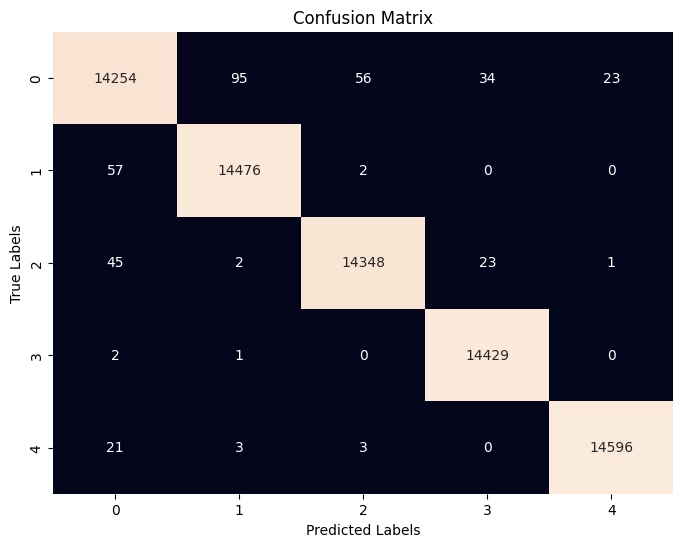

In [ ]:
evaluation(y_test_per_O,y_pred_rf_per_O)

#NN